# Домашнее задание по теме: Кластеризация

## Подготовка окружения

In [ ]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [ ]:
# !conda install matplotlib numpy scikit-learn seaborn -y

In [ ]:
# !conda install basemap matplotlib -y

In [ ]:
# !conda install -c conda-forge umap-learn -y

In [ ]:
# ipympl + widget включает интерактивные функции matplotlib

# !conda install ipympl -y
# !conda install -c conda-forge nodejs

## **ВНИМАНИЕ**

- **Задания описаны кратко, только самое необходимое, в основном только идеи и подсказки. Это творческая работа.**

- Для выполнения заданий можно использовать любые удобные способы, если в комментариях к заданию не указан конкретный метод.

- Желательно использовать максимум пройденной информации или более продвинутые способы (если нашли самостоятельно).

- Желательно писать свои идеи/мысли по поводу методов/результатов.

- В строке "Подсказка" могут быть перечислены какие-то методы, которыми можно воспользоваться, но это не обязательно, так как это только один из множества вариантов (не факт, что лучший).

- Обязательно **использовать `Pipeline`**.

- Графики можно рисовать любым способом / цветом и т.п. Главное, чтобы было понятно, что там изображено.

- При выполнении задания необходимо понимать, что значит каждое слово (на английском). Если значение слова непонятно, то необходимо разобраться с его значением самостоятельно. Пожалуйста, будьте внимательны, перепроверяйте значения слов, если не уверены.

## Импорт необходимых пакетов

In [3]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

import numpy as np
import pandas as pd

from umap import UMAP
from sklearn.decomposition import PCA

from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder


## Customer Clustering

### Загрузка данных

[Источник (Customer Clustering)](https://www.kaggle.com/dev0914sharma/customer-clustering)

In [ ]:
df_1 = pd.read_csv("./../../data/segmentation data.csv", index_col=0)
df_1

### Анализ данных

#### Типы данных

In [7]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412 entries, 0 to 4411
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   HAEMATOCRIT   4412 non-null   float64 
 1   HAEMOGLOBINS  4412 non-null   float64 
 2   ERYTHROCYTE   4412 non-null   float64 
 3   LEUCOCYTE     4412 non-null   float64 
 4   THROMBOCYTE   4412 non-null   int64   
 5   MCH           4412 non-null   float64 
 6   MCHC          4412 non-null   float64 
 7   MCV           4412 non-null   float64 
 8   AGE           4412 non-null   int64   
 9   SEX           4412 non-null   category
 10  SOURCE        4412 non-null   category
dtypes: category(2), float64(7), int64(2)
memory usage: 319.2 KB


#### Пропущенные значения

In [8]:
df_1.isna().sum()

#### Распределение данных

<AxesSubplot:xlabel='SOURCE', ylabel='count'>

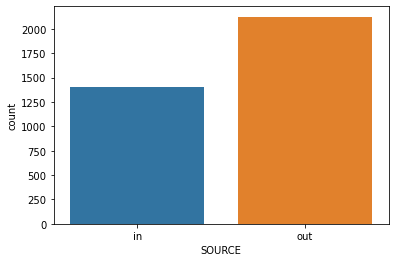

In [9]:
df_1.hist(figsize=(12, 4))
plt.tight_layout()

### Подготовка

#### Масштабирование

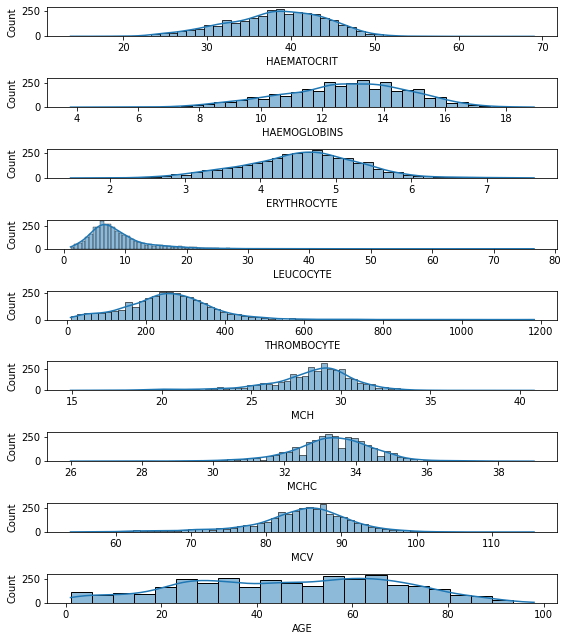

In [11]:
df_1_norm = pd.DataFrame(StandardScaler().fit_transform(df_1), columns=df_1.columns)
df_1_norm.hist(figsize=(12, 4))
plt.tight_layout()

#### Полезные функции

Text(0.5, 1.0, 'Correlation Matrix of features')

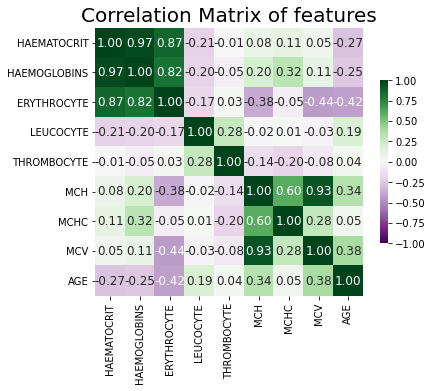

In [12]:
def explained_variance_plot(pca_obj):
    features = range(pca_obj.n_components_)
    cumulative_sum = np.cumsum(pca_obj.explained_variance_ratio_)

    plt.xlabel('PCA features')
    plt.ylabel('variance %')
    plt.xticks(features)

    plt.bar(features, pca_obj.explained_variance_ratio_, align='center', label='Individual explained variance')
    plt.step(range(0,len(cumulative_sum)), cumulative_sum, where='mid',label='Cumulative explained variance')

    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
%load_ext autotime

### N-D PCA

In [14]:
pca = PCA()
pca.fit(df_1_norm)
explained_variance_plot(pca)

### 2-D PCA

In [16]:
pca_2 = PCA(n_components=2)
df_1_pca_2 = pd.DataFrame(pca_2.fit_transform(df_1_norm))
sns.scatterplot(x=df_1_pca_2[0], y=df_1_pca_2[1], alpha=0.3)

### 2-D t-SNE

In [18]:
tsne_2 = TSNE(n_components=2)
df_1_tsne_2 = pd.DataFrame(tsne_2.fit_transform(df_1_norm))
sns.scatterplot(x=df_1_tsne_2[0], y=df_1_tsne_2[1], alpha=0.3)

### 2-D UMAP

In [ ]:
umap_2 = UMAP(n_components=2)
df_1_umap_2 = pd.DataFrame(umap_2.fit_transform(df_1_norm))
sns.scatterplot(x=df_1_umap_2[0], y=df_1_umap_2[1], alpha=0.3)

### 3-D PCA

In [21]:
pca_3 = PCA(n_components=3)
df_1_pca_3 = pd.DataFrame(pca_3.fit_transform(df_1_norm))



plot matrix: 6x4


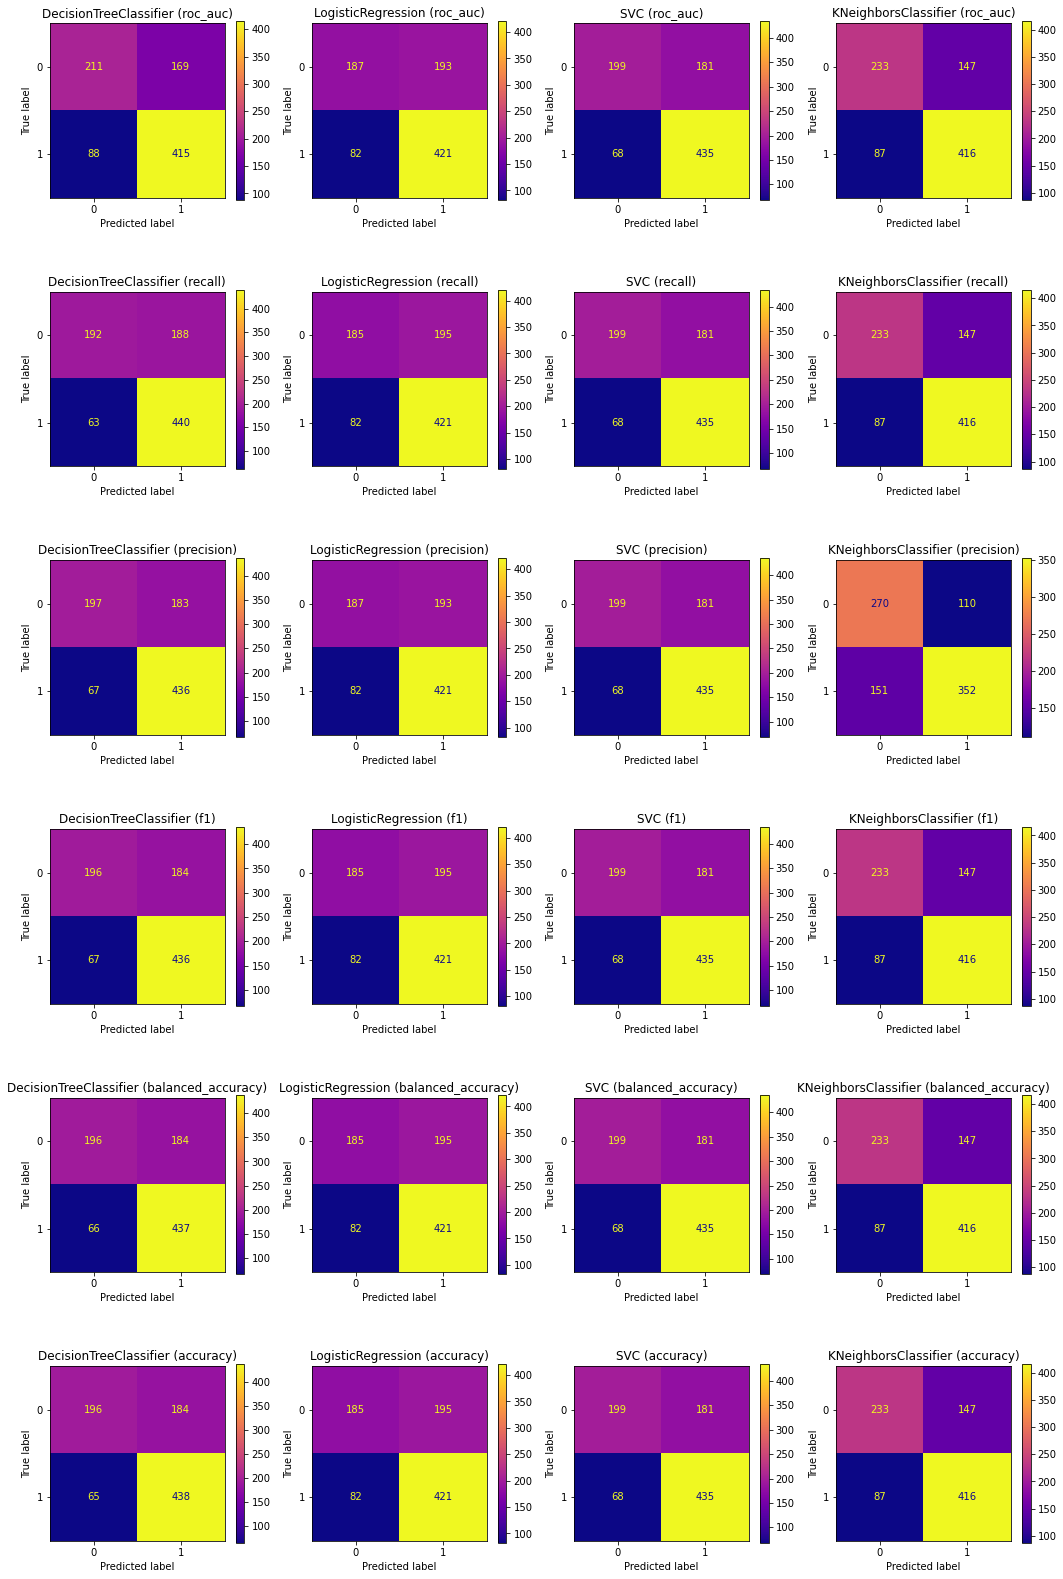

In [22]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_1_pca_3[0], df_1_pca_3[1], df_1_pca_3[2], alpha=0.3)

In [23]:
%matplotlib inline

accuracy  b_accuracy  precision  \
name                   scorer                                               
DecisionTreeClassifier roc_auc            0.708947    0.690156   0.710616   
                       recall             0.715742    0.690007   0.700637   
                       precision          0.716874    0.692610   0.704362   
                       f1                 0.715742    0.691294   0.703226   
                       balanced_accuracy  0.716874    0.692288   0.703704   
                       accuracy           0.718007    0.693282   0.704180   
LogisticRegression     roc_auc            0.688562    0.664542   0.685668   
                       recall             0.686297    0.661910   0.683442   
                       precision          0.688562    0.664542   0.685668   
                       f1                 0.686297    0.661910   0.683442   
                       balanced_accuracy  0.686297    0.661910   0.683442   
                       accuracy           0.686297    0.661910   0.683442   
SVC                    roc_auc            0.718007    0.694248   0.706169   
                       recall             0.718007    0.694248   0.706169   
                       precision          0.718007    0.694248   0.706169   
                       f1                 0.718007    0.694248   0.706169   
                       balanced_accuracy  0.718007    0.694248   0.706169   
                       accuracy           0.718007    0.694248   0.706169   
KNeighborsClassifier   roc_auc            0.734994    0.720098   0.738899   
                       recall             0.734994    0.720098   0.738899   
                       precision          0.704417    0.705164   0.761905   
                       f1                 0.734994    0.720098   0.738899   
                       balanced_accuracy  0.734994    0.720098   0.738899   
                       accuracy           0.734994    0.720098   0.738899   

                                            recall        f1   roc_auc  
name                   scorer                                           
DecisionTreeClassifier roc_auc            0.825050  0.702431  0.690156  
                       recall             0.874751  0.703472  0.690007  
                       precision          0.866799  0.706011  0.692610  
                       f1                 0.866799  0.704688  0.691294  
                       balanced_accuracy  0.868787  0.705717  0.692288  
                       accuracy           0.870775  0.706745  0.693282  
LogisticRegression     roc_auc            0.836978  0.677403  0.664542  
                       recall             0.836978  0.674742  0.661910  
                       precision          0.836978  0.677403  0.664542  
                       f1                 0.836978  0.674742  0.661910  
                       balanced_accuracy  0.836978  0.674742  0.661910  
                       accuracy           0.836978  0.674742  0.661910  
SVC                    roc_auc            0.864811  0.707620  0.694248  
                       recall             0.864811  0.707620  0.694248  
                       precision          0.864811  0.707620  0.694248  
                       f1                 0.864811  0.707620  0.694248  
                       balanced_accuracy  0.864811  0.707620  0.694248  
                       accuracy           0.864811  0.707620  0.694248  
KNeighborsClassifier   roc_auc            0.827038  0.731095  0.720098  
                       recall             0.827038  0.731095  0.720098  
                       precision          0.699801  0.705702  0.705164  
                       f1                 0.827038  0.731095  0.720098  
                       balanced_accuracy  0.827038  0.731095  0.720098  
                       accuracy           0.827038  0.731095  0.720098

### 3-D t-SNE

<AxesSubplot:ylabel='name-scorer'>

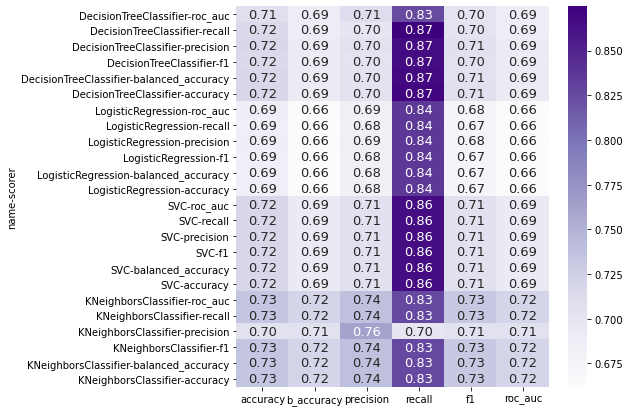

In [25]:
tsne_3 = TSNE(n_components=3)
df_1_tsne_3 = pd.DataFrame(tsne_3.fit_transform(df_1_norm))

In [ ]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=130, elev=40)

ax.scatter(df_1_tsne_3[0], df_1_tsne_3[1], df_1_tsne_3[2], alpha=0.3)

In [26]:
%matplotlib inline

['./tmp/example_model_dtc_recall.joblib']

### 3-D UMAP

In [ ]:
umap_3 = UMAP(n_components=3)
df_1_umap_3 = pd.DataFrame(umap_3.fit_transform(df_1_norm))

In [ ]:
%matplotlib widget

from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = plt.figure(figsize=(5, 5))
ax = Axes3D(fig, azim=-55, elev=45)

ax.scatter(df_1_umap_3[0], df_1_umap_3[1], df_1_umap_3[2], alpha=0.3)

In [ ]:
%matplotlib inline